In [1]:
##############################################
# Name: Francisco Nunez-Fondeur
# Description: IST 707 - Syracuse University
# Date: 05/16/2019 - Final Project - Autism AQ-10
#
# -------------------------------------------

In [2]:
#----- Installs ----#

#Install c50
if (!require(C50)) install.packages('c50')

#Install caret
if (!require(caret)) install.packages('caret')

#countrycode
if (!require(countrycode)) install.packages('countrycode')

#Install class
if (!require(class)) install.packages('class')  

#Install dplyr
if (!require(dplyr)) install.packages('dplyr')

#Install e1071
if (!require(e1071)) install.packages('e1071')

#farff
if (!require(farff)) install.packages('farff')

#gmodels
if (!require(gmodels)) install.packages('gmodels')

#Install kernlab
if (!require(kernlab)) install.packages('kernlab')

#SQLDF
if (!require(sqldf)) install.packages('sqldf')

Loading required package: C50
Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2
Loading required package: countrycode
Loading required package: class
Loading required package: dplyr

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: e1071
Loading required package: farff
Loading required package: gmodels
Loading required package: kernlab

Attaching package: 'kernlab'

The following object is masked from 'package:ggplot2':

    alpha

Loading required package: sqldf
Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite


In [3]:
#----- Step 1: Load the data sets-----#

##Load Data 
#The data was from the UCI Machine Learning Repository
#https://archive.ics.uci.edu/ml/datasets/Autistic+Spectrum+Disorder+Screening+Data+for+Children++#
#https://archive.ics.uci.edu/ml/datasets/Autistic+Spectrum+Disorder+Screening+Data+for+Adolescent+++
#https://archive.ics.uci.edu/ml/datasets/Autism+Screening+Adult

#rawdata
filepath = 'F:/School/Syracuse University/MS Data Sciences/School Work/IST/IST 707/Project/Data/Austism-Child-Data.arff'
Autism_Child_Data <- readARFF("F:/School/Syracuse University/MS Data Sciences/School Work/IST/IST 707/Project/Data/Autism-Child-Data.arff")
Autism_Adult_Data <- readARFF("F:/School/Syracuse University/MS Data Sciences/School Work/IST/IST 707/Project/Data/Autism-Adult-Data.arff")
Autism_Adolescent_Data <- readARFF("F:/School/Syracuse University/MS Data Sciences/School Work/IST/IST 707/Project/Data/Autism-Adolescent-Data.arff")

#sets for editing
AutChild <- Autism_Child_Data
AutTeen <- Autism_Adolescent_Data
AutAdult <- Autism_Adult_Data

Parse with reader=readr : F:/School/Syracuse University/MS Data Sciences/School Work/IST/IST 707/Project/Data/Autism-Child-Data.arff
Loading required package: readr
header: 0.040000; preproc: 0.000000; data: 0.030000; postproc: 0.000000; total: 0.070000
Parse with reader=readr : F:/School/Syracuse University/MS Data Sciences/School Work/IST/IST 707/Project/Data/Autism-Adult-Data.arff
header: 0.020000; preproc: 0.000000; data: 0.000000; postproc: 0.000000; total: 0.020000
Parse with reader=readr : F:/School/Syracuse University/MS Data Sciences/School Work/IST/IST 707/Project/Data/Autism-Adolescent-Data.arff
header: 0.010000; preproc: 0.000000; data: 0.000000; postproc: 0.000000; total: 0.010000


In [4]:
#----- Reorganizing Data -----#

#I will reoganize my set columns to match the attribute information document provided
AutChild <- AutChild[,c(21,11:15,20,16,17,19,1:10,18)]
AutTeen <- AutTeen[,c(21,11:15,20,16,17,19,1:10,18)]
AutAdult <- AutAdult[,c(21,11:15,20,16,17,19,1:10,18)]

#Cleansing errors
  #AutAdult
  AutAdult$ethnicity <- as.character(AutAdult$ethnicity)
  AutAdult$ethnicity[is.na(AutAdult$ethnicity)] <- "Unknown"
  AutAdult$ethnicity <- as.factor(AutAdult$ethnicity)
  AutAdult$relation <- as.character(AutAdult$relation)
  AutAdult$relation[is.na(AutAdult$relation)] <- "Unknown"
  AutAdult$relation <- as.factor(AutAdult$relation)
  
  #AutChild
  AutChild$ethnicity <- as.character(AutChild$ethnicity)
  AutChild$ethnicity[is.na(AutChild$ethnicity)] <- "Unknown"
  AutChild$ethnicity <- as.factor(AutChild$ethnicity)
  AutChild$relation <- as.character(AutChild$relation)
  AutChild$relation[is.na(AutChild$relation)] <- "Unknown"
  AutChild$relation <- as.factor(AutChild$relation)
  AutChild$relation <- gsub("self", "Self", AutChild$relation)

  #AutTeen
  AutTeen$ethnicity <- as.character(AutTeen$ethnicity)
  AutTeen$ethnicity[is.na(AutTeen$ethnicity)] <- "Unknown"
  AutTeen$ethnicity <- as.factor(AutTeen$ethnicity)
  AutTeen$relation <- as.character(AutTeen$relation)
  AutTeen$relation[is.na(AutTeen$relation)] <- "Unknown"
  AutTeen$relation <- as.factor(AutTeen$relation)
  AutTeen$age_desc <- as.factor("12-17 years")
  
  #Replace NAs in age column with mean value
  AutAdult$age[is.na(AutAdult$age)] <- mean(AutAdult$age, na.rm=TRUE)
  AutChild$age[is.na(AutChild$age)] <- mean(AutChild$age, na.rm=TRUE)
  AutTeen$age[is.na(AutTeen$age)] <- mean(AutTeen$age, na.rm=TRUE)

  #change col classification
  cols = c(11:21);    
  AutAdult[,cols] = apply(AutAdult[,cols], 2, function(x) as.numeric(as.character(x)));
  AutChild[,cols] = apply(AutChild[,cols], 2, function(x) as.numeric(as.character(x)));
  AutTeen[,cols] = apply(AutTeen[,cols], 2, function(x) as.numeric(as.character(x)));

  #combining the three sets into one total set
  AutTotal <- rbind(AutChild,AutTeen,AutAdult)
  colnames(AutTotal)[1] <- "ClassASD"
  colnames(AutTotal)[6] <- "AutismInFamily"
  colnames(AutTotal)[8] <- "country"
  colnames(AutTotal)[9] <- "used_app"
  summary(AutTotal)
  str(AutTotal)

 ClassASD       age         gender            ethnicity   jundice  
 NO :707   Min.   :  4.00   m:625   White-European :381   no :935  
 YES:393   1st Qu.: 11.00   f:475   Asian          :185   yes:165  
           Median : 21.00           Unknown        :144            
           Mean   : 22.03           Middle Eastern :128            
           3rd Qu.: 30.00           Black          : 65            
           Max.   :383.00           South Asian    : 60            
                                    (Other)        :137            
 AutismInFamily   relation                         country    used_app  
 no :946        Length:1100        United States       :167   no :1073  
 yes:154        Class :character   United Kingdom      :155   yes:  27  
                Mode  :character   India               :130             
                                   New Zealand         : 95             
                                   United Arab Emirates: 90             
                  

'data.frame':	1100 obs. of  21 variables:
 $ ClassASD      : Factor w/ 2 levels "NO","YES": 1 1 1 1 2 1 2 2 2 1 ...
 $ age           : num  6 6 6 5 5 4 5 5 11 11 ...
 $ gender        : Factor w/ 2 levels "m","f": 1 1 1 2 1 1 1 2 2 2 ...
 $ ethnicity     : Factor w/ 12 levels "Asian","Black",..: 6 5 10 10 6 10 11 5 5 10 ...
 $ jundice       : Factor w/ 2 levels "no","yes": 1 1 1 2 2 1 1 1 1 1 ...
 $ AutismInFamily: Factor w/ 2 levels "no","yes": 1 1 1 1 1 2 1 1 1 2 ...
 $ relation      : chr  "Parent" "Parent" "Unknown" "Unknown" ...
 $ country       : Factor w/ 89 levels "Jordan","United States",..: 1 1 1 1 2 3 4 5 5 6 ...
 $ used_app      : Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 1 1 1 1 ...
 $ age_desc      : Factor w/ 3 levels "4-11 years","12-17 years",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ A1_Score      : num  1 1 1 0 1 0 1 1 1 0 ...
 $ A2_Score      : num  1 1 1 1 1 0 0 1 1 0 ...
 $ A3_Score      : num  0 0 0 0 1 1 1 1 1 1 ...
 $ A4_Score      : num  0 0 0 0 1 0 1 1 1 1 ...
 $ A5_Scor

In [5]:
 #----- Look At ethnicity-----# 
  List <- NA
  List <- sqldf("select 
                          ethnicity
                          from AutTotal
                          group by ethnicity")
  # I ran List here and observed 12 ethnicities
  

In [6]:
  #----- Look At countries-----# 
  List <- NA
  List <- sqldf("select 
                          country
                          from AutTotal
                          group by country")
  # I ran List here and observed 89 countries

In [7]:
#Merge Duplicate Classifications
  #AutTotal$gender <- gsub("m", "Gender-M", AutTotal$gender)
  #AutTotal$gender <- gsub("f", "Gender-F", AutTotal$gender)
  AutTotal$ethnicity <- gsub("Hispanic", "Latino", AutTotal$ethnicity)
  AutTotal$ethnicity <- gsub("Hispanic", "Latino", AutTotal$ethnicity)
  AutTotal$ethnicity <- gsub("others", "Others", AutTotal$ethnicity)
  AutTotal$ethnicity <- gsub("Others", "Other-Ethnicity", AutTotal$ethnicity)
  AutTotal$ethnicity <- gsub("Unknown", "Unknown-Ethnicity", AutTotal$ethnicity)
  AutTotal$jundice <- gsub("yes", "JundiceY", AutTotal$jundice)
  AutTotal$jundice <- gsub("no", "JundiceN", AutTotal$jundice)
  AutTotal$AutismInFamily <- gsub("yes", "FamAutismY", AutTotal$AutismInFamily)
  AutTotal$AutismInFamily <- gsub("no", "FamAutismN", AutTotal$AutismInFamily)
  AutTotal$relation <- gsub("Health care professional", "RelationHealthcarePro", AutTotal$relation)
  AutTotal$relation <- gsub("Others", "RelationOther", AutTotal$relation)
  AutTotal$relation <- gsub("Parent", "RelationParent", AutTotal$relation)
  AutTotal$relation <- gsub("Relative", "RelationRelative", AutTotal$relation)
  AutTotal$relation <- gsub("Self", "RelationSelf", AutTotal$relation)
  AutTotal$relation <- gsub("Unknown", "RelationUnkown", AutTotal$relation)
  AutTotal$country <- gsub("Viet Nam", "Vietnam", AutTotal$country)
  AutTotal$used_app <- gsub("yes", "UsedAppY", AutTotal$used_app)
  AutTotal$used_app <- gsub("no", "UsedAppN", AutTotal$used_app)
  AutTotal$age_desc <- gsub("4-11 years", "4to11", AutTotal$age_desc)
  AutTotal$age_desc <- gsub("12-17 years", "12to17", AutTotal$age_desc)
  AutTotal$age_desc <- gsub("18 and more", "18Plus", AutTotal$age_desc)
  
          

In [8]:
  #New Continent Column created
  AutTotal$continent <- countrycode(sourcevar = AutTotal[, "country"], origin = "country.name", destination = "continent")
  AutTotal[15, 22] <- "Europe"
  AutTotal[196, 22] <- "Americas"
  AutTotal <- AutTotal[,c(1,3,5:7,9:21)]

Warning message in countrycode(sourcevar = AutTotal[, "country"], origin = "country.name", :
"Some values were not matched unambiguously: Europe, U.S. Outlying Islands
"

In [9]:
 #----- Creating Training and Test Sets FOR ONLY Questionaire-----#
          #Model shows 100% accuracy in decision tree.
          #Predicting factor is a score >6 (results)
          Total1 <- AutTotal[,c(1, 8:18)] 
          #create sets using caret library
          inTraining <- createDataPartition(Total1$ClassASD, times = 1, p = .66, list = FALSE)
          trainAut <- Total1[ inTraining,]
          trainAut$ClassASD <- droplevels( trainAut)$ClassASD
          testAut  <- Total1[-inTraining,]
          testAut$ClassASD <- droplevels(testAut)$ClassASD
          
          #building Model using c50 Algorithim (c50 library)
          dt_model <- C5.0(trainAut[-1], trainAut$ClassASD)
          dt_model
          
          summary(dt_model) 
          
          #evaluating performance
          pred_model <- predict(dt_model, testAut)
          CrossTable(testAut$ClassASD, pred_model, prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE, dnn = c('actual diagnosis', 'predicted diagnosis') )
  


Call:
C5.0.default(x = trainAut[-1], y = trainAut$ClassASD)

Classification Tree
Number of samples: 727 
Number of predictors: 11 

Tree size: 2 

Non-standard options: attempt to group attributes



Call:
C5.0.default(x = trainAut[-1], y = trainAut$ClassASD)


C5.0 [Release 2.07 GPL Edition]  	Tue Dec 10 23:01:16 2019
-------------------------------

Class specified by attribute `outcome'

Read 727 cases (12 attributes) from undefined.data

Decision tree:

result <= 6: NO (467)
result > 6: YES (260)


Evaluation on training data (727 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     2    0( 0.0%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	   467          (a): class NO
	         260    (b): class YES


	Attribute usage:

	100.00%	result


Time: 0.0 secs



 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  373 

 
                 | predicted diagnosis 
actual diagnosis |        NO |       YES | Row Total | 
-----------------|-----------|-----------|-----------|
              NO |       240 |         0 |       240 | 
                 |     0.643 |     0.000 |           | 
-----------------|-----------|-----------|-----------|
             YES |         0 |       133 |       133 | 
                 |     0.000 |     0.357 |           | 
-----------------|-----------|-----------|-----------|
    Column Total |       240 |       133 |       373 | 
-----------------|-----------|-----------|-----------|

 


In [10]:
 #Create Expanded  Set for more DM
  #help from https://www.r-statistics.com/tag/transpose/
  AutExp <- AutTotal
                      #----- Step 1: Gender-----# 
                      List <- NA
                      List <- sqldf("select 
                                          Gender
                                          from AutExp
                                          group by Gender")
                      List1 <- List
                      Column <- NA
                      Column <- t(List1)
                      colnames(Column) <- Column[1,]
                      NewDF <- Column
                      #Part2
                      B <- NA
                      B <- matrix(NA, nrow = (length(AutExp$ClassASD)), ncol = (length(List$gender)))
                      B <- as.data.frame (B)
                      colnames(B) <- Column
                      colnames(B) <- Column[1,]
                      
                      #Combine
              NewAutDF <- cbind(AutExp,B)
                     #----- Step 2: Jundice-----# 
                      List <- NA
                      List <- sqldf("select 
                                                          jundice
                                                          from AutExp
                                                          group by jundice")
                      List1 <- List
                      Column <- NA
                      Column <- t(List1)
                      colnames(Column) <- Column[1,]
                      NewDF <- Column
                      #Part2
                      B <- NA
                      B <- matrix(NA, nrow = (length(AutExp$ClassASD)), ncol = (length(List$jundice)))
                      B <- as.data.frame (B)
                      colnames(B) <- Column
                      colnames(B) <- Column[1,]
                      #Combine
              NewAutDF <- cbind(NewAutDF,B)
                      #----- Step 3: AutismInFamily -----# 
                      List <- NA
                      List <- sqldf("select 
                                                                  AutismInFamily 
                                                                  from AutExp
                                                                  group by AutismInFamily")
                      List1 <- List
                      Column <- NA
                      Column <- t(List1)
                      colnames(Column) <- Column[1,]
                      NewDF <- Column
                      #Part2
                      B <- NA
                      B <- matrix(NA, nrow = (length(AutExp$ClassASD)), ncol = (length(List$AutismInFamily )))
                      B <- as.data.frame (B)
                      colnames(B) <- Column
                      colnames(B) <- Column[1,]
                      #Part3
              NewAutDF <- cbind(NewAutDF,B)        
                      #----- Step 4: Relation -----# 
                      List <- NA
                      List <- sqldf("select 
                                                    relation
                                                    from AutExp
                                                    group by relation")
                      List1 <- List
                      Column <- NA
                      Column <- t(List1)
                      colnames(Column) <- Column[1,]
                      NewDF <- Column
                      #Part2
                      B <- NA
                      B <- matrix(NA, nrow = (length(AutExp$ClassASD)), ncol = (length(List$relation)))
                      B <- as.data.frame (B)
                      colnames(B) <- Column
                      colnames(B) <- Column[1,]
                      #Part3
            NewAutDF <- cbind(NewAutDF,B)  
                      #----- Step 5: Used App-----# 
                      List <- NA
                      List <- sqldf("select 
                                                                    used_app
                                                                    from AutExp
                                                                    group by used_app")
                      List1 <- List
                      Column <- NA
                      Column <- t(List1)
                      colnames(Column) <- Column[1,]
                      NewDF <- Column
                      #Part2
                      B <- NA
                      B <- matrix(NA, nrow = (length(AutExp$ClassASD)), ncol = (length(List$used_app)))
                      B <- as.data.frame (B)
                      colnames(B) <- Column
                      colnames(B) <- Column[1,]
                      #Part3
              NewAutDF <- cbind(NewAutDF,B)  
                    #----- Step 5: Age Desc-----# 
                    List <- NA
                    List <- sqldf("select 
                                                                          age_desc
                                                                          from AutExp
                                                                          group by age_desc")
                    List1 <- List
                    Column <- NA
                    Column <- t(List1)
                    colnames(Column) <- Column[1,]
                    NewDF <- Column
                    #Part2
                    B <- NA
                    B <- matrix(NA, nrow = (length(AutExp$ClassASD)), ncol = (length(List$age_desc)))
                    B <- as.data.frame (B)
                    colnames(B) <- Column
                    colnames(B) <- Column[1,]
                    #Part3
              NewAutDF <- cbind(NewAutDF,B)  
  AutExp2 <- NewAutDF

In [11]:
 #2 Fill in Rows for DM
  #From https://www.listendata.com/2017/03/if-else-in-r.html
  #mydata$x4 = ifelse(mydata$x2>150,1,0)
          colnames(AutExp2)

          AutExp2[,19] = ifelse((AutExp2[,2])==(colnames(AutExp2[19])),1,0)
          AutExp2[,20] = ifelse((AutExp2[,2])==(colnames(AutExp2[20])),1,0)
          AutExp2[,21] = ifelse((AutExp2[,3])==(colnames(AutExp2[21])),1,0)
          AutExp2[,22] = ifelse((AutExp2[,3])==(colnames(AutExp2[22])),1,0)
          AutExp2[,23] = ifelse((AutExp2[,4])==(colnames(AutExp2[23])),1,0)
          AutExp2[,24] = ifelse((AutExp2[,4])==(colnames(AutExp2[24])),1,0)
          AutExp2[,25] = ifelse((AutExp2[,5])==(colnames(AutExp2[25])),1,0)
          AutExp2[,26] = ifelse((AutExp2[,5])==(colnames(AutExp2[26])),1,0)
          AutExp2[,27] = ifelse((AutExp2[,5])==(colnames(AutExp2[27])),1,0)
          AutExp2[,28] = ifelse((AutExp2[,5])==(colnames(AutExp2[28])),1,0)
          AutExp2[,29] = ifelse((AutExp2[,5])==(colnames(AutExp2[29])),1,0)
          AutExp2[,30] = ifelse((AutExp2[,5])==(colnames(AutExp2[30])),1,0)
          AutExp2[,31] = ifelse((AutExp2[,6])==(colnames(AutExp2[31])),1,0)
          AutExp2[,32] = ifelse((AutExp2[,6])==(colnames(AutExp2[32])),1,0)
          AutExp2[,33] = ifelse((AutExp2[,7])==(colnames(AutExp2[33])),1,0)
          AutExp2[,34] = ifelse((AutExp2[,7])==(colnames(AutExp2[34])),1,0)
          AutExp2[,35] = ifelse((AutExp2[,7])==(colnames(AutExp2[35])),1,0)
          

[1] "ClassASD"              "gender"                "jundice"              
 [4] "AutismInFamily"        "relation"              "used_app"             
 [7] "age_desc"              "A1_Score"              "A2_Score"             
[10] "A3_Score"              "A4_Score"              "A5_Score"             
[13] "A6_Score"              "A7_Score"              "A8_Score"             
[16] "A9_Score"              "A10_Score"             "result"               
[19] "f"                     "m"                     "JundiceN"             
[22] "JundiceY"              "FamAutismN"            "FamAutismY"           
[25] "RelationHealthcarePro" "RelationOther"         "RelationParent"       
[28] "RelationRelative"      "RelationSelf"          "RelationUnkown"       
[31] "UsedAppN"              "UsedAppY"              "12to17"               
[34] "18Plus"                "4to11"

In [12]:
#----- Creating Traing and Test Sets FOR ALL FACTORS (No quetionaire)-----#
        #Total2 <- AutExp2[,c(1, 2, 11:137)] 
        #Total2 <- AutExp2[,c(1, 2, 22:53)] 
        Total2 <- AutExp2[,c(1,19:35)]
        
        #create sets using caret library
        inTraining <- createDataPartition(Total2$ClassASD, times = 1, p = .66, list = FALSE)
        trainAut <- Total2[ inTraining,]
        trainAut$ClassASD <- droplevels( trainAut)$ClassASD
        testAut  <- Total2[-inTraining,]
        testAut$ClassASD <- droplevels(testAut)$ClassASD
        
        #building Model using c50 Algorithim (c50 library)
        dt_model <- C5.0(trainAut[-1], trainAut$ClassASD)
        dt_model #use summary(dt_model) to get the % accuracy and tree
        
        summary(dt_model) 
        
        #evaluating performance
        pred_model <- predict(dt_model, testAut)
        CrossTable(testAut$ClassASD, pred_model, prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE, dnn = c('actual diagnosis', 'predicted diagnosis') )
        
        #improving model performance
        dt_boost10 <- C5.0(trainAut[-1], trainAut$ClassASD, trials= 10)
        dt_boost10 #use summary(dt_boost10) to get the % accuracy and tree
        summary(dt_boost10)
        
        #evaluating boosted performance
        pred_model_boost  <- predict(dt_boost10, testAut)
        CrossTable(testAut$ClassASD, pred_model_boost, prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE, dnn = c('actual diagnosis', 'predicted diagnosis') )
       


Call:
C5.0.default(x = trainAut[-1], y = trainAut$ClassASD)

Classification Tree
Number of samples: 727 
Number of predictors: 17 

Tree size: 5 

Non-standard options: attempt to group attributes



Call:
C5.0.default(x = trainAut[-1], y = trainAut$ClassASD)


C5.0 [Release 2.07 GPL Edition]  	Tue Dec 10 23:01:16 2019
-------------------------------

Class specified by attribute `outcome'

Read 727 cases (18 attributes) from undefined.data

Decision tree:

18Plus > 0: NO (463/126)
18Plus <= 0:
:...RelationUnkown > 0: NO (33/10)
    RelationUnkown <= 0:
    :...f > 0: YES (84/33)
        f <= 0:
        :...JundiceN <= 0: YES (28/10)
            JundiceN > 0: NO (119/55)


Evaluation on training data (727 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     5  234(32.2%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	   424    43    (a): class NO
	   191    69    (b): class YES


	Attribute usage:

	100.00%	18Plus
	 36.31%	RelationUnkown
	 31.77%	f
	 20.22%	JundiceN


Time: 0.0 secs



 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  373 

 
                 | predicted diagnosis 
actual diagnosis |        NO |       YES | Row Total | 
-----------------|-----------|-----------|-----------|
              NO |       212 |        28 |       240 | 
                 |     0.568 |     0.075 |           | 
-----------------|-----------|-----------|-----------|
             YES |       102 |        31 |       133 | 
                 |     0.273 |     0.083 |           | 
-----------------|-----------|-----------|-----------|
    Column Total |       314 |        59 |       373 | 
-----------------|-----------|-----------|-----------|

 



Call:
C5.0.default(x = trainAut[-1], y = trainAut$ClassASD, trials = 10)

Classification Tree
Number of samples: 727 
Number of predictors: 17 

Number of boosting iterations: 10 requested;  1 used due to early stopping

Non-standard options: attempt to group attributes



Call:
C5.0.default(x = trainAut[-1], y = trainAut$ClassASD, trials = 10)


C5.0 [Release 2.07 GPL Edition]  	Tue Dec 10 23:01:16 2019
-------------------------------

Class specified by attribute `outcome'

Read 727 cases (18 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

18Plus > 0: NO (463/126)
18Plus <= 0:
:...RelationUnkown > 0: NO (33/10)
    RelationUnkown <= 0:
    :...f > 0: YES (84/33)
        f <= 0:
        :...JundiceN <= 0: YES (28/10)
            JundiceN > 0: NO (119/55)

-----  Trial 1:  -----

Decision tree:

RelationUnkown > 0: NO (94.7/21.7)
RelationUnkown <= 0:
:...18Plus <= 0: YES (240.6/110.5)
    18Plus > 0:
    :...FamAutismN <= 0: YES (66.1/27.8)
        FamAutismN > 0: NO (325.6/113.6)

-----  Trial 2:  -----

Decision tree:
 NO (727/306.5)

*** boosting reduced to 2 trials since last classifier is very inaccurate

*** boosting abandoned (too few classifiers)


Evaluation on training data (727 cases):

	    Decision Tree   
	  ------


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  373 

 
                 | predicted diagnosis 
actual diagnosis |        NO |       YES | Row Total | 
-----------------|-----------|-----------|-----------|
              NO |       212 |        28 |       240 | 
                 |     0.568 |     0.075 |           | 
-----------------|-----------|-----------|-----------|
             YES |       102 |        31 |       133 | 
                 |     0.273 |     0.083 |           | 
-----------------|-----------|-----------|-----------|
    Column Total |       314 |        59 |       373 | 
-----------------|-----------|-----------|-----------|

 



Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = trainAut, y = trainAut$ClassASD)

A-priori probabilities:
trainAut$ClassASD
       NO       YES 
0.6423659 0.3576341 

Conditional probabilities:
                 ClassASD
trainAut$ClassASD NO YES
              NO   1   0
              YES  0   1

                 f
trainAut$ClassASD      [,1]      [,2]
              NO  0.3897216 0.4882101
              YES 0.4538462 0.4988255

                 m
trainAut$ClassASD      [,1]      [,2]
              NO  0.6102784 0.4882101
              YES 0.5461538 0.4988255

                 JundiceN
trainAut$ClassASD      [,1]      [,2]
              NO  0.8650964 0.3419870
              YES 0.8076923 0.3948736

                 JundiceY
trainAut$ClassASD      [,1]      [,2]
              NO  0.1349036 0.3419870
              YES 0.1923077 0.3948736

                 FamAutismN
trainAut$ClassASD      [,1]      [,2]
              NO  0.8779443 0.3277011
              YES 0.


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|-------------------------|

 
Total Observations in Table:  373 

 
                 | predicted diagnosis 
actual diagnosis |        NO |       YES | Row Total | 
-----------------|-----------|-----------|-----------|
              NO |       235 |         5 |       240 | 
                 |     0.979 |     0.021 |     0.643 | 
                 |     0.992 |     0.037 |           | 
-----------------|-----------|-----------|-----------|
             YES |         2 |       131 |       133 | 
                 |     0.015 |     0.985 |     0.357 | 
                 |     0.008 |     0.963 |           | 
-----------------|-----------|-----------|-----------|
    Column Total |       237 |       136 |       373 | 
                 |     0.635 |     0.365 |           | 
-----------------|-----------|-----------|-----------|

 


Confusion Matrix and Statistics

                
Auttestpredicter  NO YES
             NO  235   2
             YES   5 131
                                          
               Accuracy : 0.9812          
                 95% CI : (0.9617, 0.9924)
    No Information Rate : 0.6434          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9593          
                                          
 Mcnemar's Test P-Value : 0.4497          
                                          
            Sensitivity : 0.9792          
            Specificity : 0.9850          
         Pos Pred Value : 0.9916          
         Neg Pred Value : 0.9632          
             Prevalence : 0.6434          
         Detection Rate : 0.6300          
   Detection Prevalence : 0.6354          
      Balanced Accuracy : 0.9821          
                                          
       'Positive' Class : NO              
               


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = trainAut, y = trainAut$ClassASD, laplace = 3)

A-priori probabilities:
trainAut$ClassASD
       NO       YES 
0.6423659 0.3576341 

Conditional probabilities:
                 ClassASD
trainAut$ClassASD          NO         YES
              NO  0.993657505 0.006342495
              YES 0.011278195 0.988721805

                 f
trainAut$ClassASD      [,1]      [,2]
              NO  0.3897216 0.4882101
              YES 0.4538462 0.4988255

                 m
trainAut$ClassASD      [,1]      [,2]
              NO  0.6102784 0.4882101
              YES 0.5461538 0.4988255

                 JundiceN
trainAut$ClassASD      [,1]      [,2]
              NO  0.8650964 0.3419870
              YES 0.8076923 0.3948736

                 JundiceY
trainAut$ClassASD      [,1]      [,2]
              NO  0.1349036 0.3419870
              YES 0.1923077 0.3948736

                 FamAutismN
trainAut$ClassASD      [,1]     


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|-------------------------|

 
Total Observations in Table:  373 

 
                 | predicted diagnosis 
actual diagnosis |        NO |       YES | Row Total | 
-----------------|-----------|-----------|-----------|
              NO |       226 |        14 |       240 | 
                 |     0.942 |     0.058 |     0.643 | 
                 |     0.974 |     0.099 |           | 
-----------------|-----------|-----------|-----------|
             YES |         6 |       127 |       133 | 
                 |     0.045 |     0.955 |     0.357 | 
                 |     0.026 |     0.901 |           | 
-----------------|-----------|-----------|-----------|
    Column Total |       232 |       141 |       373 | 
                 |     0.622 |     0.378 |           | 
-----------------|-----------|-----------|-----------|

 


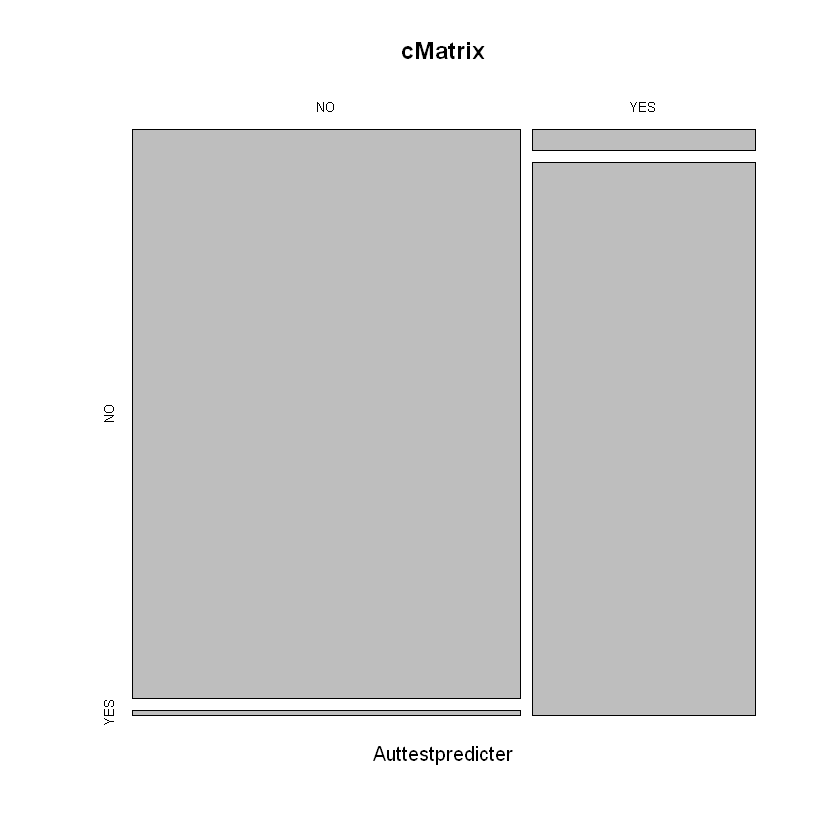

In [13]:
 #----- Use Na?ve Bayes Model-----# 
        #build the classifiers
        Autclassifier<- naiveBayes(trainAut, trainAut$ClassASD)
        Autclassifier
        
        #evaluate model classfier
        Auttestpredicter <- predict(Autclassifier, testAut)
      
        #compare predictions to true values
        CrossTable(testAut$ClassASD, Auttestpredicter, prop.chisq = FALSE, prop.t = FALSE, dnn = c('actual diagnosis', 'predicted diagnosis') )
      
        #create confusion matrix
        cMatrix <- table(Auttestpredicter, testAut$ClassASD)
        plot(cMatrix)
        confusionMatrix(cMatrix)
        
        #build improved model
        Autclassifier2<- naiveBayes(trainAut, trainAut$ClassASD, laplace = 3)
        Autclassifier2
        
        #evaluate improved model
        Auttestpredicter2 <- predict(Autclassifier2, testAut)
        
        #compare improved predictions to true values
        CrossTable(testAut$ClassASD, Auttestpredicter2, prop.chisq = FALSE, prop.t = FALSE, dnn = c('actual diagnosis', 'predicted diagnosis') )
 

In [14]:
#----- Use k-NN Model-----# 
        #model training
        trainAutlabel <- trainAut[,1]
        testAutlabel <- testAut [,1]
        knnAutSpread <- knn(train=trainAut[,-1], testAut [,-1], cl=trainAutlabel, k=7)
        summary(knnAutSpread)
        CrossTable(x=testAutlabel, y=knnAutSpread, prop.chisq = FALSE)
        
        #improved performance using z-score standardization
        #new model training
        Total2z <- as.data.frame(scale(Total2[,-1]))
        Total2z_train <- Total2z[1:733,]
        Total2z_test <- Total2z[734:1100,]
        Total2z_train_label <- Total2[1:733,1]
        Total2z_test_label <- Total2[734:1100,1]
        
        #new performance
        knnAutPrediction <- knn(train=Total2z_train, Total2z_test, cl=Total2z_train_label, k=11)
        summary(knnAutPrediction)
        CrossTable(x=Total2z_test_label, y=knnAutPrediction, prop.chisq = FALSE)   
        

NO YES 
313  60


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  373 

 
             | knnAutSpread 
testAutlabel |        NO |       YES | Row Total | 
-------------|-----------|-----------|-----------|
          NO |       213 |        27 |       240 | 
             |     0.887 |     0.112 |     0.643 | 
             |     0.681 |     0.450 |           | 
             |     0.571 |     0.072 |           | 
-------------|-----------|-----------|-----------|
         YES |       100 |        33 |       133 | 
             |     0.752 |     0.248 |     0.357 | 
             |     0.319 |     0.550 |           | 
             |     0.268 |     0.088 |           | 
-------------|-----------|-----------|-----------|
Column Total |       313 |        60 |       373 | 
             |     0.839 |     0.161 |           | 
-------------|---

NO YES 
332  35


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  367 

 
                   | knnAutPrediction 
Total2z_test_label |        NO |       YES | Row Total | 
-------------------|-----------|-----------|-----------|
                NO |       247 |        26 |       273 | 
                   |     0.905 |     0.095 |     0.744 | 
                   |     0.744 |     0.743 |           | 
                   |     0.673 |     0.071 |           | 
-------------------|-----------|-----------|-----------|
               YES |        85 |         9 |        94 | 
                   |     0.904 |     0.096 |     0.256 | 
                   |     0.256 |     0.257 |           | 
                   |     0.232 |     0.025 |           | 
-------------------|-----------|-----------|-----------|
      Column Total |       332 |       

In [15]:
#----- Use SVM Model-----#      
        #build the model classifier
        ksvmmodelclassifier <- ksvm(ClassASD ~ ., data=trainAut, kernel ="vanilladot")
        ksvmmodelclassifier
        
        #evaluate performance
        ksmvmodelpredictions  <- predict(ksvmmodelclassifier, testAut)
        CrossTable(testAut$ClassASD, ksmvmodelpredictions, prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE, dnn = c('actual number', 'predicted number') )
        #model predicted 236 / 373 (63.27%)
        
        #improved performance
        ksvmmodelclassifierrbf <- ksvm(ClassASD ~ ., data=trainAut, kernel ="rbfdot")
        ksvmmodelclassifierrbf
        ksmvmodelpredictionsrbf  <- predict(ksvmmodelclassifierrbf, testAut)
        CrossTable(testAut$ClassASD, ksmvmodelpredictionsrbf, prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE, dnn = c('actual number', 'predicted number') )
        #model predicted 247/ 373 (66.21%) 

 Setting default kernel parameters  


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Linear (vanilla) kernel function. 

Number of Support Vectors : 510 

Objective Function Value : -494.1371 
Training error : 0.339752 


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  373 

 
              | predicted number 
actual number |        NO |       YES | Row Total | 
--------------|-----------|-----------|-----------|
           NO |       225 |        15 |       240 | 
              |     0.603 |     0.040 |           | 
--------------|-----------|-----------|-----------|
          YES |       109 |        24 |       133 | 
              |     0.292 |     0.064 |           | 
--------------|-----------|-----------|-----------|
 Column Total |       334 |        39 |       373 | 
--------------|-----------|-----------|-----------|

 


Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  0.0499250670201563 

Number of Support Vectors : 506 

Objective Function Value : -464.2426 
Training error : 0.299862 


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  373 

 
              | predicted number 
actual number |        NO |       YES | Row Total | 
--------------|-----------|-----------|-----------|
           NO |       220 |        20 |       240 | 
              |     0.590 |     0.054 |           | 
--------------|-----------|-----------|-----------|
          YES |       113 |        20 |       133 | 
              |     0.303 |     0.054 |           | 
--------------|-----------|-----------|-----------|
 Column Total |       333 |        40 |       373 | 
--------------|-----------|-----------|-----------|

 
